In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils.parse_pars import parse_pars
from spamm.run_spamm import spamm
import run_fe, run_nc, run_bc, run_hg, run_ne
from utils.add_in_quadrature import add_in_quadrature
from spamm.analysis import plot_best_models
from spamm.Samples import Samples

In [2]:
# This should be a wavelength range from 1000-10,000A, every 0.5A
TEST_wave = parse_pars()["testing"]

# Create wavelength array from min, max and step values
wave = np.arange(TEST_wave["wave_min"], TEST_wave["wave_max"], TEST_wave["wave_step"])

# These values were picked by hand to provide the most realistic power law.
NC_PARAMS = {"wave": wave,
             "slope1": 2.3,
             "norm_PL": 5e-15,
             "broken_pl": False}

# The normalizations are drawn from a gaussian sample with mu=9.06e-15,
# sigma=3.08946e-15 (from 0->template max flux). fe_width is halfway 
# between range in parameters. wave is very close to template span (1075-7535)
FE_PARAMS = {"fe_norm_1": 1.07988504e-14,
             "fe_norm_2": 6.91877436e-15,
             "fe_norm_3": 5e-15,# 8.68930476e-15, 
             "fe_width": 5450,
             "no_templates": 3,
             "wave": wave}

# These values are just the midpoints of the parameter space in parameters.yaml
BC_PARAMS = {"bc_norm": 3e-14,
             "bc_tauBE": 1.,
             "bc_logNe": 5.5,
             "bc_loffset": 0.,
             "bc_lwidth": 5050.,
             "bc_Te": 50250.,
             "bc_lines": 201.5,
             "wave": wave}

# These values are just the midpoints of the parameter space in parameters.yaml
HG_PARAMS = {"hg_norm_1": 6e-15,
             "hg_stellar_disp": 515,
             "no_templates": 1,
             "wave": wave}

NEL_PARAMS = {"width": 10, 
              "amp_1": 5e-14, 
              "center_1": 4830,
              "amp_2": 8e-14, 
              "center_2": 6800,
              "amp_3": 15e-14, 
              "center_3": 3000,
              "wave": wave}

LINEOUT = "#"*75

In [3]:
def generate_data(components=None, comp_params=None):
    
    all_waves = []
    all_fluxes = []
    all_errs = []
    comb_p = {}
    comp_names = {}
    
    for component in components:
        component = component.upper()
        if component == "PL" or component == "NC":
            comp_wave, comp_flux, comp_err, comp_p = run_nc.create_nc(comp_params["PL"])
            comp_names["PL"] = True
            
        elif component == "FE":
            comp_wave, comp_flux, comp_err, comp_p = run_fe.create_fe(comp_params["FE"])
            comp_names["FE"] = True
            
        elif component == "BC" or component == "BPC":
            comp_wave, comp_flux, comp_err, comp_p = run_bc.create_bc(comp_params["BC"])
            comp_names["BC"] = True
            comp_names["BpC"] = True
            
        elif component == "HG" or component == "HOST":
            comp_wave, comp_flux, comp_err, comp_p = run_hg.create_hg(comp_params["HOST"])
            comp_names["HOST"] = True

        elif component == "NEL":
            comp_wave, comp_flux, comp_err, comp_p = run_ne.create_ne(comp_params["NEL"])
            comp_names["NEL"] = True
            
        all_fluxes.append(comp_flux)
        all_waves.append(comp_wave)
        all_errs.append(comp_err)
        comb_p = {**comb_p, **comp_p}

    comb_wave = wave
    comb_flux = np.sum(all_fluxes, axis=0)
    comb_err = add_in_quadrature(all_errs)
    
    print(f"{LINEOUT}\nUsing components: {components}")
    
    return comb_wave, comb_flux, comb_err, all_fluxes, comp_names

NC params: {'wl': array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
       1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1143, 1144, 1145, 1146, 11

Text(0, 0.5, 'Flux')

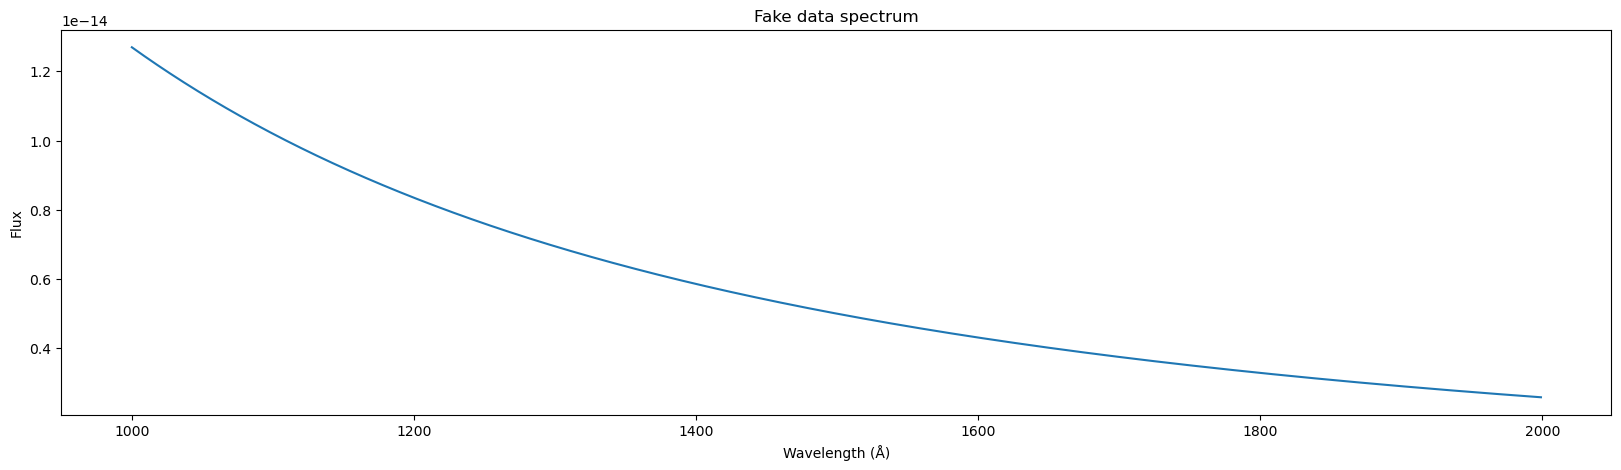

In [6]:
components=["PL", "NEL", "BC", "FE", "HG"]
comp_params={"PL": NC_PARAMS, "NEL": NEL_PARAMS, "BC": BC_PARAMS, "FE": FE_PARAMS, "HOST": HG_PARAMS}

wave, flux, flux_err, all_fluxes, comp_names = generate_data(components=components, comp_params=comp_params)

fig = plt.figure(figsize=(20,5))
plt.plot(wave, flux)
plt.title(f"Fake data spectrum")
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux")

In [5]:
spamm(comp_names, (wave, flux, flux_err), comp_params=comp_params,
      n_walkers=32, n_iterations=1000, , parallel=True,
      outdir="combined_example", picklefile="combined")

100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 170.12it/s]


Mean acceptance fraction: 0.693
Saved pickle file combined_test/combined.pickle.gz
Plotting the sample projections.
	Saved combined_triangle.png
Plotting the MCMC chains.
	Saved combined_chain.png
Plotting the model posterior PDFs.
	Saved combined_posterior.png
Saved combined_test/combined_posterior.pdf
executed in 0:00:06.628920


{'model': <spamm.Model.Model at 0x1680d7e90>,
 'comp_params': {'PL': {'wl': array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
          1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
          1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
          1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
          1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
          1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
          1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
          1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
          1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
          1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
          1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
          1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
          1132,

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>